# Contenido

* [Introducción](#intro)
    * [objetivo](#objetive)
* [Descripción de datos](#description)
    * [Dataframe plans_data](#d_plans)
    * [Dataframe users_data](#d_users)
        * [Corrrección de datos](#c_5)
        * [Enriquecimiento de datos](#e_5)
    * [Dataframe calls_data](#d_calls)
        * [Corrrección de datos](#c_1)
        * [Enriquecimiento de datos](#e_1)
    * [Dataframe internet_data](#d_internet)
        * [Corrrección de datos](#c_2)
        * [Enriquecimiento de datos](#e_2)
    * [Dataframe messages_data](#d_messages)
        * [Corrrección de datos](#c_3)
        * [Enriquecimiento de datos](#e_3)
* [Estudio de las condiciones del plan](#plan)
* [Agregar datos por usuario](#datos)
* [Estudio de comportamiento del usuario](#estudio)
    * [Llamadas](#llamadas)
    * [Mensajes](#mensajes)
    * [Internet](#internet)
    * [Ingreso](#ingreso)
    * [Conclusión](#conclution_1)
* [Comprobación de hipótesis](#hipo)
    * [Hipótesis 1](#hip_1)
    * [Hipótesis 2](#hip_2)
* [Conclusión General](#final_conclution)


## Introducción <a id='intro'></a> 

Megaline empresa de telecomunicaciones ofrece a sus clientes dos tarifas de prepago: "surf" y "ultimate". El departamento comercial de la empresa quiere saber en cual tarifa tiene mejor ingreso para invertir en publicidad.
Para ellos nos proporciona distintos cvs con información del 2018 acerca de la duración de llamadas, mensajes enviados, información del usuario y la cantidad de datos gastados mes a mes.

Contamos con 5 tablas:

* megaline_calls.csv
* megaline_internet.csv
* megaline_messages.csv
* megaline_plans.csv
* megaline_users.csv

### Objetivos<a id = 'objetive'></a>

1. Determinar que tárifa deja más ingresos
2. Comprobar la hipótesis de si el ingreso por las tarifas surf y ultimate difiere
3. Comprobar la hipótesis de si el ingreso promedio de los usuarios de Nueva Yory y Nueva Jersey es diferente a la de otras regiones


Pasos a seguir:

1. Cargar nuestras 5 tablas y guardarlas en una variable, se estudiaran si la tabla contiene errores, tiene valores nulos,duplicados, errores en los nombres etc.
2. Se realará un nuevo dataframe uniendo los datos de usuario_id, número de llamadas, duración de las llamadas, número de mensajes, cantidad de datos utilizados,ciudad de cada usuario y por último se obtendrá la ganancia que deja el usuario dependiendo de como usa su plan de acuerdo a las políticas de la empresa
3. Realización de graficas en donde podamos ver relaciones y nos ayude a poder responder nuestras preguntas
4. Comprobaremos las hipótesis planteadas 

Para ello se crearan funciones según sea necesario para evitar repetir mucho código.



## **Descripción de datos<a id= 'description'></a>**

In [2]:
# Librerás necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st


A continuación cargaremo nuestros dataframes, veremos la descripción de cada uno y observaremos una pequeña muestra. 

In [3]:
# Carga los archivos de datos en diferentes DataFrames

try:
    # Tabla de llamadas
    calls_data = pd.read_csv('C:/Users/jfcom/Documents/sprint4_project/datasets/megaline_calls.csv') 
    # tabla de internet
    internet_data = pd.read_csv('C:/Users/jfcom/Documents/sprint4_project/datasets/megaline_internet.csv') 
    # tabla de mensajes
    messages_data = pd.read_csv('C:/Users/jfcom/Documents/sprint4_project/datasets/megaline_messages.csv') 
    # Tabla de planes
    plans_data = pd.read_csv('C:/Users/jfcom/Documents/sprint4_project/datasets/megaline_plans.csv')
    # Tabla de usuarios
    users_data = pd.read_csv('C:/Users/jfcom/Documents/sprint4_project/datasets/megaline_users.csv')
except:
    calls_data = pd.read_csv('/datasets/megaline_calls.csv') 
    # tabla de internet
    internet_data = pd.read_csv('/datasets/megaline_internet.csv') 
    # tabla de mensajes
    messages_data = pd.read_csv('/datasets/megaline_messages.csv') 
    # Tabla de planes
    plans_data = pd.read_csv('/datasets/megaline_plans.csv')
    # Tabla de usuarios
    users_data = pd.read_csv('/datasets/megaline_users.csv')
    

### Dataframe plans_data <a id = 'd_plans'></a>

In [4]:
# Información general/resumen sobre el DataFrame de los planes
plans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [5]:
# Muestra de dataframe calls_data
plans_data.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [6]:
# verificación de valores duplicados
print('Cantidad de valores duplicados:' ,plans_data.duplicated().sum())

Cantidad de valores duplicados: 0


Nuestra Tabla cuenta con 2 datos y 8 columnas descritas a continuación:

-	`plan_name`: Nombre de la tarifa
-	`usd_monthly_fee`: Pago mensual en dólares estadounidenses
-	`minutes_included`: Minutos incluidos al mes
-	`messages_included`: SMS incluidos al mes
-	`mb_per_month_included`: Datos incluidos al mes (en megabytes)
-	`usd_per_minute`: Precio por minuto tras exceder los límites del paquete 
-	`usd_per_message`:Precio por SMS tras exceder los límites del paquete
-	`usd_per_gb`: Precio por gigabyte de los datos extra tras exceder los límites del paquete (1 GB = 1024 megabytes)



No se encuentran valores nulos ni duplicados. En esta tabla encontramos información valiosa de como es cada plan y condiciones

### Dataframe users_data <a id = 'd_users'></a>

In [7]:
#Información general/resumen sobre el DataFrame user
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
# Muestra de dataframe calls_data
users_data.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


In [9]:
# verificación de valores duplicados
print('Cantidad de valores duplicados:' ,users_data.duplicated().sum())

Cantidad de valores duplicados: 0


Nuestra Tabla cuenta con 500 datos y 8 columnas descritas a continuación:

-	`user_id`: Identificador único del usuario
-	`first_name`:Nombre del usuario
-	`last_name`: Apellido del usuario
- `age`: Edad del usuario (en años)
-	`reg_date`: Fecha de suscripción (dd, mm, aa)
-	`churn_date`: Fecha en que el usuario dejó de usar el servicio 
-	`city`:ciudad de residencia del usuario
-	`plan`:Nombre de la tarifa


No se encuentran valore ni duplicados. Tenemos presencia de valores nulos, pero por la descripción de nuestra columna `churn_date` deben de significar que aún siguen con el plan. Nuestras columnas `churn_date` y `reg_date` tiene de tipo de datos erroneos, este se cambiara por un tipo datetime64 posteriormente

In [10]:
#Cantidad de personas en el plan surf
print(f'Número de usuarios en el plan surf: {users_data[users_data["plan"]== "surf"]["plan"].count()}')

Número de usuarios en el plan surf: 339


In [11]:
#Cantidad de personas en el plan ultimate
print(f'Número de usuarios en el plan ultimate: {users_data[users_data["plan"]== "ultimate"]["plan"].count()}')

Número de usuarios en el plan ultimate: 161


#### Corrección de datos <a id = 'c_4'></a>

In [12]:
#conversion a tipo datetime
users_data['reg_date']= users_data['reg_date'].astype('datetime64[D]')
users_data['churn_date']= users_data['churn_date'].astype('datetime64[D]', errors = 'ignore')

#Impresión de una muestra y verificación de tipo de dato
print(users_data['reg_date'])
print("\n****************************************************\n")
print(users_data['churn_date'])

0     2018-12-24
1     2018-08-13
2     2018-10-21
3     2018-01-28
4     2018-05-23
         ...    
495   2018-09-04
496   2018-02-20
497   2018-12-10
498   2018-02-04
499   2018-05-06
Name: reg_date, Length: 500, dtype: datetime64[ns]

****************************************************

0     NaT
1     NaT
2     NaT
3     NaT
4     NaT
       ..
495   NaT
496   NaT
497   NaT
498   NaT
499   NaT
Name: churn_date, Length: 500, dtype: datetime64[ns]


### Dataframe calls_data <a id = 'd_calls'></a>

In [13]:
# Información general del data
calls_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [14]:
# Muestra de dataframe calls_data
calls_data.head(10)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


In [15]:
# verificación de valores duplicados
print('Cantidad de valores duplicados:' ,calls_data.duplicated().sum())

Cantidad de valores duplicados: 0


Nuestra Tabla cuenta con 13773 datos y 4 columnas descritas a continuación:

La tabla calls (datos sobre las llamadas):
- `id`: Identificador único de la llamada
-	`user_id`: El identificador del usuario que realiza la llamada
- `call_date`: Fecha de la llamada
-	`duration`: Duración de la llamada (en minutos)


No se encuentran valores nulos, ni duplicados. En cuanto a los tipos de datos solo la columna `call_date` tiene de tipo de dato erroneo, este se cambiara por un tipo datetime64
Vamos a crear dos columnas nuevas en esta tabla, la primera donde se encuentre el mes y la segunda donde se encuentre la duración de las llamadas redondeadas hacia arriba


#### Corrección de datos<a id= 'c_1'></a>

In [16]:
#conversion a tipo datetime
calls_data['call_date']= calls_data['call_date'].astype('datetime64[D]')

#Impresión de una muestra y verificación de tipo de dato
calls_data['call_date']

0        2018-12-27
1        2018-12-27
2        2018-12-27
3        2018-12-28
4        2018-12-30
            ...    
137730   2018-11-21
137731   2018-10-20
137732   2018-09-21
137733   2018-10-10
137734   2018-12-29
Name: call_date, Length: 137735, dtype: datetime64[ns]

#### Enriquecimiento de datos<a id = 'e_1'></a>

In [17]:
#Creación de columna de mes
calls_data['month'] = calls_data['call_date'].dt.month

# #Creación de columna de duraciones redondeadas
calls_data['duration_rounded']= np.ceil(calls_data['duration']).astype('int16')

#Revisión de cambios aplicados
calls_data.head(10)

,id,user_id,call_date,duration,month,duration_rounded
0,1000_93,1000,2018-12-27,8.52,12,9
1,1000_145,1000,2018-12-27,13.66,12,14
2,1000_247,1000,2018-12-27,14.48,12,15
3,1000_309,1000,2018-12-28,5.76,12,6
4,1000_380,1000,2018-12-30,4.22,12,5
5,1000_388,1000,2018-12-31,2.20,12,3
6,1000_510,1000,2018-12-27,5.75,12,6
7,1000_521,1000,2018-12-28,14.18,12,15
8,1000_530,1000,2018-12-28,5.77,12,6
9,1000_544,1000,2018-12-26,4.40,12,5


In [18]:
#Revisión de cambios aplicados
calls_data.head(10)

,id,user_id,call_date,duration,month,duration_rounded
0,1000_93,1000,2018-12-27,8.52,12,9
1,1000_145,1000,2018-12-27,13.66,12,14
2,1000_247,1000,2018-12-27,14.48,12,15
3,1000_309,1000,2018-12-28,5.76,12,6
4,1000_380,1000,2018-12-30,4.22,12,5
5,1000_388,1000,2018-12-31,2.20,12,3
6,1000_510,1000,2018-12-27,5.75,12,6
7,1000_521,1000,2018-12-28,14.18,12,15
8,1000_530,1000,2018-12-28,5.77,12,6
9,1000_544,1000,2018-12-26,4.40,12,5


### Dataframe internet_data<a id= 'd_internet'></a>

In [19]:
#Información general/resumen sobre el DataFrame internet
internet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [20]:
# Muestra de dataframe calls_data
internet_data.head(10)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


In [21]:
# verificación de valores duplicados
print('Cantidad de valores duplicados:' ,internet_data.duplicated().sum())

Cantidad de valores duplicados: 0


Nuestra Tabla cuenta con 104825 datos y 4 columnas descritas a continuación:

La tabla calls (datos sobre las llamadas):
- `id`: Identificador único de la sesión
-	`user_id`: El identificador del usuario que realiza la llamada
-	`session_date`: Fecha de la sesión web
- `mb_used`: Volumen de datos gastados durante la sesión (en megabytes)


No se encuentran valores nulos, ni duplicados. En cuanto a los tipos de datos solo la columna `session_date` tiene de tipo de dato erroneo, este se cambiara por un tipo datetime64 posteriormente. Realizaremos una columna nueva con el mes obtenido de la columna session_Date

#### Corrección de datos<a id= 'c_2'></a>

In [22]:
#conversion a tipo datetime
internet_data['session_date']= internet_data['session_date'].astype('datetime64[D]')

#Impresión de una muestra y verificación de tipo de dato
internet_data['session_date']

0        2018-12-29
1        2018-12-31
2        2018-12-28
3        2018-12-26
4        2018-12-27
            ...    
104820   2018-10-20
104821   2018-12-30
104822   2018-09-22
104823   2018-12-07
104824   2018-12-24
Name: session_date, Length: 104825, dtype: datetime64[ns]

#### Enriquecimiento de datos<a id = 'e_2'></a>

In [23]:
#Creación de columna de mes
internet_data['month'] = internet_data['session_date'].dt.month

In [24]:
#Revisión de cambios aplicados
internet_data.head(10)

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12
5,1001_0,1001,2018-08-24,284.68,8
6,1001_3,1001,2018-12-09,656.04,12
7,1001_4,1001,2018-11-04,16.97,11
8,1001_10,1001,2018-11-27,135.18,11
9,1001_15,1001,2018-12-13,761.92,12


### Dataframe messages_data<a id = 'd_messages'></a>

In [25]:
#Información general/resumen sobre el DataFrame de messages
messages_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [26]:
# Muestra de dataframe calls_data
messages_data.head(10)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


In [27]:
# verificación de valores duplicados
print('Cantidad de valores duplicados:' ,messages_data.duplicated().sum())

Cantidad de valores duplicados: 0


Nuestra Tabla cuenta con 76051 datos y 3 columnas descritas a continuación:

La tabla calls (datos sobre las llamadas):
- `id`: Identificador único del SMS
-	`user_id`: El identificador del usuario que manda el SMS
- `message_date`: Fecha del SMS

No se encuentran valores nulos, ni duplicados. En cuanto a los tipos de datos solo la columna `message_date` tiene de tipo de dato erroneo, este se cambiara por un tipo datetime64 posteriormente.
Agregaremos una columna para identificar el mes de los mensajes hechos


#### Corrección de datos<a id = 'c_3'></a>

In [28]:
#conversion a tipo datetime
messages_data['message_date']= messages_data['message_date'].astype('datetime64[D]')

#Impresión de una muestra y verificación de tipo de dato
messages_data['message_date']

0       2018-12-27
1       2018-12-31
2       2018-12-31
3       2018-12-27
4       2018-12-26
           ...    
76046   2018-12-24
76047   2018-12-24
76048   2018-12-31
76049   2018-12-24
76050   2018-12-23
Name: message_date, Length: 76051, dtype: datetime64[ns]

#### Enriquecimiento de los datos <a id = 'e_3' >

In [29]:
#Creación de la nueva columna
messages_data['month'] = messages_data['message_date'].dt.month

In [30]:
#Impresión de los datos para verificación de nueva columna
messages_data.head(10)

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12
5,1000_346,1000,2018-12-29,12
6,1000_386,1000,2018-12-30,12
7,1000_413,1000,2018-12-31,12
8,1000_502,1000,2018-12-27,12
9,1000_525,1000,2018-12-28,12


## Estudio de las condiciones del plan<a id = 'plan'></a>

Como se ha mencionado con anterioridad la empresa maneja dos planes que acontinuación se desglosan lo que incluye(minutos, GB, mensajes, costo del plan y costo por conceptos excedentes):

Surf
*	Pago mensual: 20$\$$
*	500 minutos al mes, 50 SMS y 15 GB de datos
*	Si se exceden los límites del paquete:
*	1 minuto: 3 centavos
*	1 SMS: 3 centavos
*	1 GB de datos: 10$\$$

Ultimate
*	Pago mensual: 70$\$$
*	3000 minutos al mes, 1000 SMS y 30 GB de datos
*	Si se exceden los límites del paquete:
*	1 minuto: 1 centavo
*	1 SMS: 1 centavo
*	1 GB de datos: 7$\$$

Es importante recalcar dos cosas:

1. Las llamadas siempre se redondea hacia el siguiente minuto a partir del primer segundo, esto es por llamada no por total de minutos hablados al mes

2. La suma total de datos al mes se redondean al siguiente GB, esto es apartir del siguiente mb utilizado después de haberse acabado el otrogado por el plan.

A continuación se muestra de nuevo nuestra tabla de planes nuevamente y posteriormente haremos una función para el cálculo de la facturación del usuario de acuerdo a su plan


In [31]:
# Muestra de tabla de planes
plans_data

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [32]:
# Obtenemos nuestros Valores de la tabla

# Obtener datos del plan surf
plan_surf = plans_data[plans_data['plan_name']== 'surf']
cost_surf = plan_surf['usd_monthly_pay'].values[0] # costo del plan
minutes_surf = plan_surf['minutes_included'].values[0] # minutos de llamadas incluidos
messages_surf = plan_surf['messages_included'].values[0] # mensajes incluidos
data_surf = plan_surf['mb_per_month_included'].values[0]# datos incluidos
extra_min_mes_surf = plan_surf['usd_per_message'].values[0] # cobro extra por mensaje y minuto de llamada incluidos
extra_data_surf = plan_surf['usd_per_gb'].values[0] # cobro extra por datos

# Obtener datos del plan surf
plan_ultimate = plans_data[plans_data['plan_name']== 'ultimate']
cost_ultimate = plan_ultimate['usd_monthly_pay'].values[0] # costo del plan
minutes_ultimate = plan_ultimate['minutes_included'].values[0] # minutos de llamadas incluidos
messages_ultimate = plan_ultimate['messages_included'].values[0] # mensajes incluidos
data_ultimate = plan_ultimate['mb_per_month_included'].values[0]# datos incluidos
extra_min_mes_ultimate = plan_ultimate['usd_per_message'].values[0] # cobro extra por mensaje y minuto de llamada incluidos
extra_data_ultimate = plan_ultimate['usd_per_gb'].values[0] # cobro extra por datos

In [33]:
# Calcula el ingreso mensual para cada usuario
def invoice(df):

    total = 0
    
#Codigo para el cobro de los planes surf
    if df['plan'] == 'surf':
        total = cost_surf # Precio base
        # Cobro por minutos extras de llamadas
        if df['calls_duration'] > minutes_surf:
            total += (df['calls_duration'] - minutes_surf) * extra_min_mes_surf
        # Cobro por mensajes extras
        if df['messages_by_month'] > messages_surf:
            total += (df['messages_by_month'] - messages_surf) * extra_min_mes_surf
        # Cobro por uso de datos excendente
        if df['mb_used'] > data_surf:
            total = (df['GB_used'] - (data_surf/1024))*extra_data_surf
    
#Codigo para el cobro de los planes ultimate
    elif df['plan'] == 'ultimate':
        total = cost_ultimate # Precio base
        # Cobro por minutos extras de llamadas
        if df['calls_duration'] > minutes_ultimate:
            total += (df['calls_duration'] - minutes_ultimate) *  extra_min_mes_ultimate
        # Cobro por mensajes extras
        if df['messages_by_month'] > messages_ultimate:
            total += (df['messages_by_month'] - messages_ultimate) *  extra_min_mes_ultimate
        # Cobro por uso de dato excendente
        if df['mb_used'] > data_ultimate:
            total += (df['GB_used'] - (data_ultimate/1024))* extra_data_ultimate # Corrección de datos

    return total

## Agregar datos por usuario <a id = 'datos'></a>

Vamos a realizar una nueva tabla uniendo información específica de nuestras otras tables, vamos a agruparlas por alguna caracteristica y obtendremos ya sea un valor de cantidad de eventos o un promedio por mes.
La tabla estará conformada por las siguientes columnas:

* Id del usuario
* Mes
* Número de llamadas
* duración de  las llamadas (estas ya estaran redondeadas según las condiciones de la empresa)
* Número de mensajes
* Cantidad de mb utilizados
* Cantidad de mb redondeados a GB según las condiciones de la empresa
* Plan al que pertenece el usuario
* Su facturación

In [34]:
#Función para realizar agrupaciones necesarias

def group_data (df, month_column, column , aggfunc = 'count'):
    return df.groupby(['user_id', month_column], as_index = False)[column].agg(aggfunc)


In [35]:
# Número de llamadas del usuario por mes
calls_users_by_month = group_data(calls_data, 'month','call_date', 'count')#calls_data.pivot_table(index=['user_id', 'call_month'], values = 'call_date', aggfunc = 'count')
#Mostramos resultado
calls_users_by_month.head()

,user_id,month,call_date
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64


In [36]:
# Número de minutos por mes por usuario
duration_calls_users_by_month = group_data(calls_data, 'month', 'duration_rounded','sum')
#Mostramos resultado
duration_calls_users_by_month.head()


,user_id,month,duration_rounded
0,1000,12,124
1,1001,8,182
2,1001,9,315
3,1001,10,393
4,1001,11,426


In [37]:
# Número de minutos por mes por usuario
messages_users_by_month = group_data(messages_data, 'month', 'message_date', 'count') 
#Mostramos resultado
messages_users_by_month.head()


,user_id,month,message_date
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [38]:
# Tabla con datos usados por mes y por usuario
mb_internet_users_by_month = group_data(internet_data,'month', 'mb_used', 'sum')

#Mostramos resultado
mb_internet_users_by_month.head()

,user_id,month,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30


Para nuestra tabla anterior vamos a agregar una nueva columna que contenga los mb transformados a GB y redondeados

In [39]:
# Nueva columna para los valores transformados a GB
mb_internet_users_by_month['GB_used'] = np.ceil( mb_internet_users_by_month['mb_used'].agg([lambda x : x/1024]))

#Imprimir una muestra
mb_internet_users_by_month.head()

,user_id,month,mb_used,GB_used
0,1000,12,1901.47,2.0
1,1001,8,6919.15,7.0
2,1001,9,13314.82,14.0
3,1001,10,22330.49,22.0
4,1001,11,18504.30,19.0


In [40]:
# Combinacion de datos para las llamadas, minutos, mensajes e internet con base en el user_id y el mes

resume_df =pd.DataFrame(users_data['user_id']) # De nuestra users_data tomamos los id de nuestros usuarios
#resume_df=resume_df.merge(calls_users_by_month,how = 'left')
# resume_df = calls_users_by_month.merge(duration_calls_users_by_month, how='left')

tables = [calls_users_by_month,duration_calls_users_by_month,messages_users_by_month,mb_internet_users_by_month]

for element in tables:
    resume_df = resume_df.merge(element, how = 'left')

resume_df.head(10)

,user_id,month,call_date,duration_rounded,message_date,mb_used,GB_used
0,1000,12.0,16.0,124.0,11.0,1901.47,2.0
1,1001,8.0,27.0,182.0,30.0,6919.15,7.0
2,1001,9.0,49.0,315.0,44.0,13314.82,14.0
3,1001,10.0,65.0,393.0,53.0,22330.49,22.0
4,1001,11.0,64.0,426.0,36.0,18504.30,19.0
5,1001,12.0,56.0,412.0,44.0,19369.18,19.0
6,1002,10.0,11.0,59.0,15.0,6552.01,7.0
7,1002,11.0,55.0,386.0,32.0,19345.08,19.0
8,1002,12.0,47.0,384.0,41.0,14396.24,15.0
9,1003,12.0,149.0,1104.0,50.0,27044.14,27.0


Cambiaremos los nombres de algunas de nuestras columnas para que sea más claro de interpretar la tabla

In [41]:
#Cambiar nombres de columnas

resume_df = resume_df.rename(columns = {'call_date': 'calls_by_month',
                                 'duration_rounded':'calls_duration',
                                 'message_date': 'messages_by_month',
                                }
)

In [42]:
# Añade el plan de cada usuario
resume_df = resume_df.merge(users_data[['user_id','plan']], how='left')

# muestra del plan
resume_df.head()

,user_id,month,calls_by_month,calls_duration,messages_by_month,mb_used,GB_used,plan
0,1000,12.0,16.0,124.0,11.0,1901.47,2.0,ultimate
1,1001,8.0,27.0,182.0,30.0,6919.15,7.0,surf
2,1001,9.0,49.0,315.0,44.0,13314.82,14.0,surf
3,1001,10.0,65.0,393.0,53.0,22330.49,22.0,surf
4,1001,11.0,64.0,426.0,36.0,18504.30,19.0,surf


Aplicaremos la función creada en nuestro apartado de Estudio de las condiciones del plan a la tabla anterior para calcular la facturación por mes del usuario.

In [43]:
#Aplicación de la función para saber la cuenta del usuario por mes
resume_df['invoice'] = resume_df.apply(invoice, axis = 1)

#Verificación de tabla con nueva columna
resume_df.head()

,user_id,month,calls_by_month,calls_duration,messages_by_month,mb_used,GB_used,plan,invoice
0,1000,12.0,16.0,124.0,11.0,1901.47,2.0,ultimate,70.0
1,1001,8.0,27.0,182.0,30.0,6919.15,7.0,surf,20.0
2,1001,9.0,49.0,315.0,44.0,13314.82,14.0,surf,20.0
3,1001,10.0,65.0,393.0,53.0,22330.49,22.0,surf,70.0
4,1001,11.0,64.0,426.0,36.0,18504.30,19.0,surf,40.0


## Estudio del comportamiento del usuario<a id = 'estudio'></a>

Para el estudio realizaremos 4 funciones que nos ayudarán a realizar nuestras gráficas. Aquí se observaran el comportamiento de los usuarios por mes para las características de:

* Número y duración de llamadas
* Número de mensajes
* Datos utilizados

In [44]:
#Función para graficar barras por mes
def plot_bar(values, title):
    (
    resume_df
    .pivot_table(index = 'month', values = values)
    .plot(kind= 'bar', title = title)
    )
    plt.show()


# Función para gráficas de histogramas por plan

def plot_hist(column, x_label, title_1, title_2, title_general):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,6))
    ax1.hist(resume_df[resume_df['plan'] == 'surf'][column],bins = 30)
    ax1.set_title(title_1)
    ax1.set_xlabel(x_label)
    ax1.set_ylabel('Frecuency')

    ax2.hist(resume_df[resume_df['plan'] == 'ultimate'][column],bins = 30)
    ax2.set_title(title_2)
    ax2.set_xlabel(x_label)
    ax2.set_ylabel('Frecuency')

    fig.suptitle(title_general)
    plt.show()

#Calculo de media y varianza
def mean_median(column):
    #Mean and var
    mean_var = []
    plan = ['ultimate', 'surf']
    # Calcula la media y la varianza de la duración mensual de llamadas.
    for element in plan:
        mean_var.append(resume_df[resume_df['plan'] == element][column].mean())
        mean_var.append(np.var(resume_df[resume_df['plan'] == element][column]))
    return  mean_var

#Realización de boxplot
def plot_boxplot(column,title,ylabel):
    resume_df.boxplot(column = column, figsize = (7,5), by = 'plan' )
    plt.title(title)
    plt.ylabel(ylabel)
    plt.show()

### Llamadas<a id='llamadas'></a>

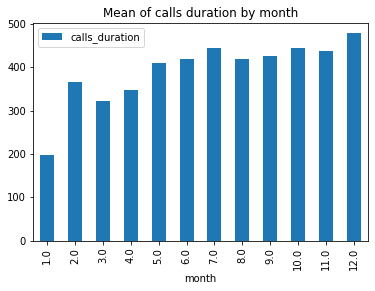

In [45]:
# Gráfica de barras de llamadas por mes
plot_bar('calls_duration','Mean of calls duration by month')

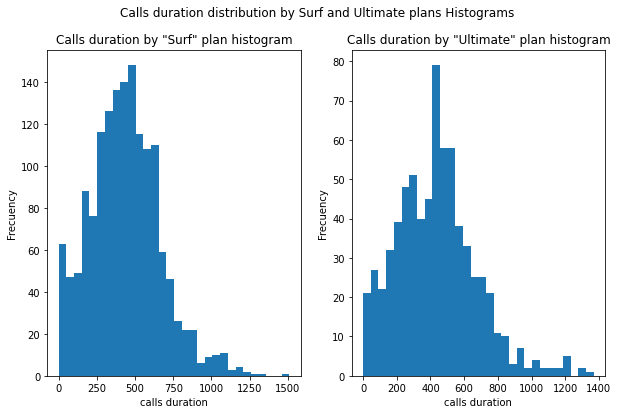

In [46]:
# Llamadas al mes por planes

plot_hist('calls_duration','calls duration',
          'Calls duration by "Surf" plan histogram',
          'Calls duration by "Ultimate" plan histogram',
          'Calls duration distribution by Surf and Ultimate plans Histograms')


Observamos que ambas graficas están sesgadas hacia la derecha.

- Histograma del plan **"Surf"**: Aqui observamos un pico entre 400 y 450 minutos de duració y tenemos algún valores superiores de 1000 por lo que existe gente que excede los límites de minutos del plan

- Histograma del plan **"Ultimate"**: Observamos que nuestro pico está más o menos parecido que en el plan de surf (entre 400 y 450), observamos que aquí no se superó el límite del plan



In [47]:
# Calculo de la media y la varianza de la duración mensual de llamadas.

call_values = mean_median('calls_duration')

#Imprimimos nuestros valores
print(f'Plan Ultimate Media:{call_values[0]: .2F}, Varianza:{call_values[1]: .2f}, Desviación:{np.sqrt(call_values[1]): .2f}')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print(f'Plan Surf Media:{call_values[2]: .2f}, Varianza:{call_values[3]: .3f}, Desviación:{np.sqrt(call_values[3]): .2f}')

Plan Ultimate Media: 434.68, Varianza: 56494.29, Desviación: 237.69
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Plan Surf Media: 436.52, Varianza: 52537.037, Desviación: 229.21


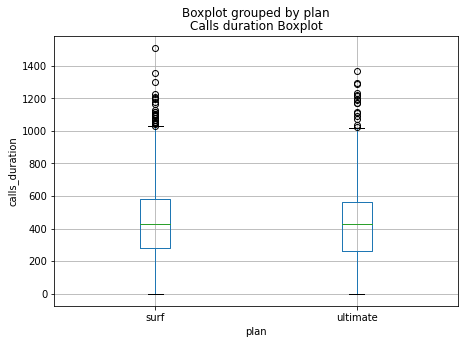

In [48]:
# Diagrama de caja llamadas
plot_boxplot('calls_duration','Calls duration Boxplot','calls_duration')

**Conclusión intermedia**

En nuestra gráfica de barras observamos que el mes en donde se realizan más llamadas es en el mes de Diciembre, posiblemete por las fiestas de navidad y año nuevo. 

En nuestros histogramas observamos que ambos planes tienen el mismo sesgo y que  los usuarios del plan surf en cierta cantidad se pasan de sus límites, mientras los usuarios del otro plan no.

Una vez realizado el calculo de las medias, varianzas y desviación observamos que están cercanas. Y finalmente vemos en nuestro boxplot que se tiene una distribución bastante pareja con algunos valores atípicos. 

### Mensajes<a id='mensajes'></a>

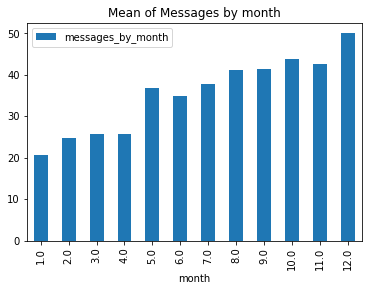

In [49]:
# Grafica de mensajes al mes
plot_bar('messages_by_month','Mean of Messages by month')

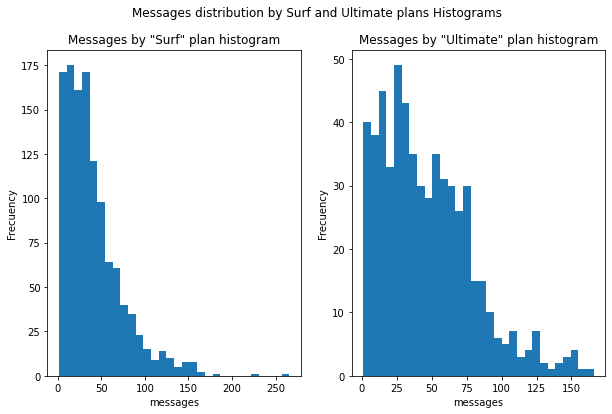

In [50]:
#Mensajes al mes por tipo de plan
plot_hist('messages_by_month','messages',
          'Messages by "Surf" plan histogram',
          'Messages by "Ultimate" plan histogram',
          'Messages distribution by Surf and Ultimate plans Histograms')

Observamos que ambas al igual que en la columna de llamadas que las graficas están sesgadas hacia la derecha.

- Histograma del plan **"Surf"**: Aqui observamos un pico entre 20 y 25 mensajes y tenemos varios valores superiores a 50 que es el límite de  del plan

- Histograma del plan **"Ultimate"**: Observamos que nuestro pico está más o menos el el rango entre 25 y 30, observamos que aquí no se superó el límite del plan, tampoco hay algún valor cercano a este límite


In [51]:
#Obtenemos nuestras medias y varianzas
messages_values = mean_median('messages_by_month')

#Imprimimos nuestros valores
print(f'Plan Ultimate Media:{messages_values[0]: .2F}, Varianza:{messages_values[1]: .2f}, Desviación:{np.sqrt(messages_values[1]): .2f}')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print(f'Plan Surf Media:{messages_values[2]: .2f}, Varianza:{messages_values[3]: .3f}, Desviación:{np.sqrt(messages_values[3]): .2f}')

Plan Ultimate Media: 46.46, Varianza: 1082.52, Desviación: 32.90
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Plan Surf Media: 39.98, Varianza: 1100.615, Desviación: 33.18


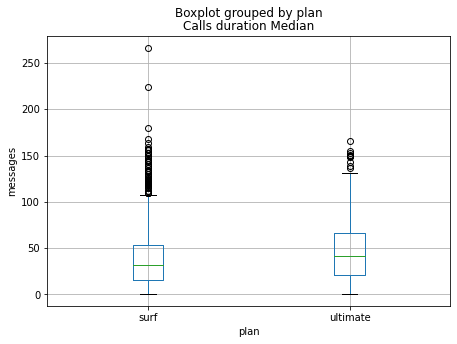

In [52]:
# Diagrama de caja mensajes
plot_boxplot('messages_by_month','Calls duration Median','messages')

**Conclusión intermedia**

En nuestra gráfica de barras observamos que el mes en donde se realizan más mensajes es en el mes de Diciembre, al igual que en el apartado de llamadas se puede deber a las fiestas de navidad y año nuevo. 

En nuestros histogramas observamos que ambos planes tienen el mismo sesgo y que  los usuarios del plan surf en cierta cantidad se pasan de sus límites, mientras los usuarios del otro plan no.

En los calculos de las medias, varianzas y desviación observamos que están un poco más dispersas que en la situación de las medianas. Y finalmente vemos en nuestro boxplot que los usuarios de los planes de ultimate tienden a enviar más mensajes que los usuarios del plan surf

### Internet <a id='internet'></a>

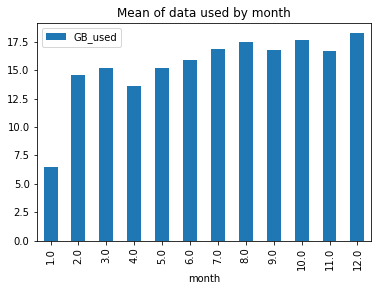

In [53]:
# Grafica de uso de internet al mes
plot_bar('GB_used','Mean of data used by month')

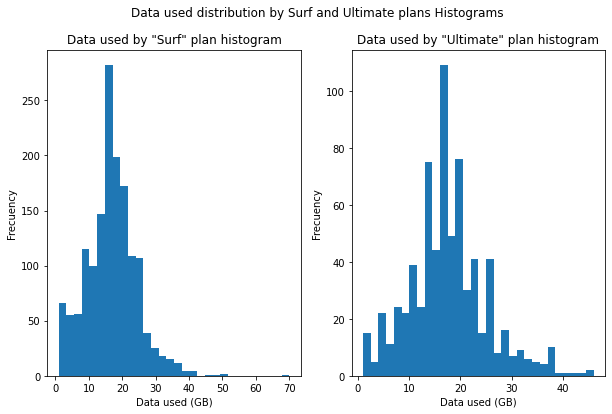

In [54]:
#Mensajes al mes por tipo de plan
plot_hist('GB_used','Data used (GB)',
          'Data used by "Surf" plan histogram',
          'Data used by "Ultimate" plan histogram',
          'Data used distribution by Surf and Ultimate plans Histograms')

Observamos que ambas al igual que en la columna de llamadas que las graficas están sesgadas hacia la derecha, aunque para la distribución de los planes de ultimate se notan más picos.

- Histograma del plan **"Surf"**: Aqui observamos un pico entre 15 y 20 mensajes y tenemos varios valores superiores a 15 nuestro límite para este plan, tambíen hay algunos valores más arriba de 50

- Histograma del plan **"Ultimate"**: Observamos que nuestro pico está más o menos el el rango entre 15 y 20, observamos que aquí no se superó el límite del plan a diferencia de los otros apartados notamos que si exiten usuarios que sobrepasaron el límite, inclusive se nota un pico más omenos entre 36 a 38 GB aproximadamente

In [55]:
#Obtenemos nuestras medias y varianzas
internet_values = mean_median('GB_used')

#Imprimimos nuestros valores
print(f'Plan Ultimate Media:{internet_values[0]: .2F}, Varianza:{internet_values[1]: .2f}, Desviación:{np.sqrt(internet_values[1]): .2f}')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print(f'Plan Surf Media:{internet_values[2]: .2f}, Varianza:{internet_values[3]: .3f}, Desviación:{np.sqrt(internet_values[3]): .2f}')

Plan Ultimate Media: 17.37, Varianza: 57.38, Desviación: 7.57
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Plan Surf Media: 16.78, Varianza: 56.908, Desviación: 7.54


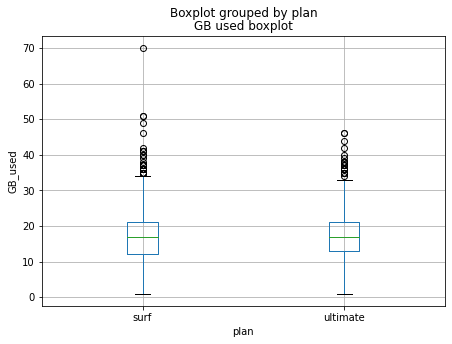

In [56]:
# Diagrama de caja mensajes
plot_boxplot('GB_used','GB used boxplot','GB_used')

**Conclusión intermedia**

En nuestra gráfica de barras observamos que el mes en donde se utilizan más datos es en el mes de Diciembre, al igual que en nuestros anteriores apartados se puede deber a las fiestas de navidad y año nuevo. Tambíen se nota que en general aumenta el uso de datos conforme pasan los meses.

En nuestros histogramas observamos que ambos planes tienen el mismo sesgo pero la gráfica del plan ultimate tiene varios picos, en este apartado existen usuarios de ambos planes que rebasaron los límites

En los calculos de las medias, varianzas y desviación observamos que están muy similares, la desviación estandar está más cerca por lo que la dispersión es más bajas. 

En el boxplot podemos observar como la mediana esta cercana entre ambos planes, tambíen notamos que el sego en nuestro plan surf esta un poco más hacía la izquierda.

### Ingreso<a id='ingreso'></a>

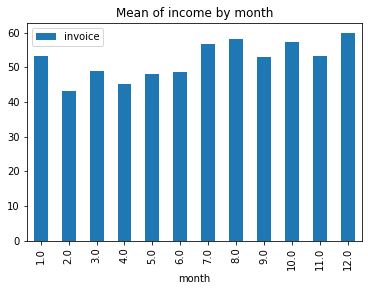

In [57]:
# Grafica de mensajes al mes
plot_bar('invoice','Mean of income by month')

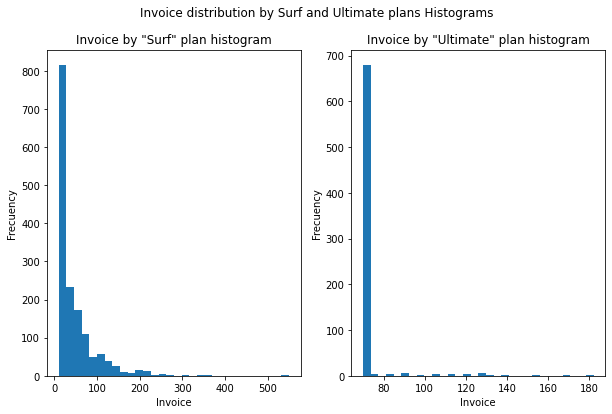

In [58]:
#Mensajes al mes por tipo de plan
plot_hist('invoice','Invoice',
          'Invoice by "Surf" plan histogram',
          'Invoice by "Ultimate" plan histogram',
          'Invoice distribution by Surf and Ultimate plans Histograms')

En esta gráfica observamos cosas interesantes

- Histograma del plan **"Surf"**: Aqui observamos que el pico está en los cuando se tiene un gasto alrededor de $\$$20 y tambien vemos como nuestras frecuencia van disminuyendo aumenta la factura. Tambien tenemos algunas facturas mayores a $\$$500

- Histograma del plan **"Ultimate"**: Observamos que la mayoria de los datos están centrados en un gasto alrededor de $\$$70 el valor del plan y de ahí podemos observar algunos valores con facturación mayor a $\$$150

In [59]:
#Obtenemos nuestras medias y varianzas
invoice_values = mean_median('invoice')

#Imprimimos nuestros valores
print(f'Plan Ultimate Media:{invoice_values[0]: .2F}, Varianza:{invoice_values[1]: .2f}, Desviación:{np.sqrt(invoice_values[1]): .2f}')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print(f'Plan Surf Media:{invoice_values[2]: .2f}, Varianza:{invoice_values[3]: .3f}, Desviación:{np.sqrt(invoice_values[3]): .2f}')

Plan Ultimate Media: 72.26, Varianza: 127.65, Desviación: 11.30
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Plan Surf Media: 46.82, Varianza: 2178.436, Desviación: 46.67


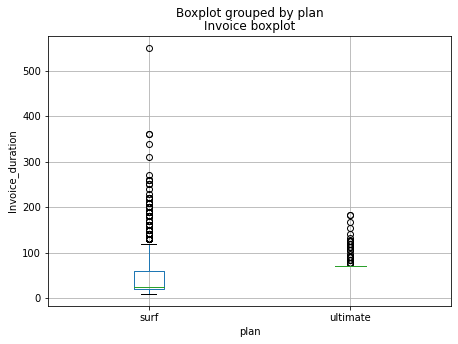

In [60]:
# Diagrama de caja mensajes
plot_boxplot('invoice','Invoice boxplot','Invoice_duration')

**Conclusión intermedia**

En nuestra gráfica de barras observamos que el mes en donde se realizan más gastos es en el mes de Diciembre, al igual que en nuestros anteriores apartados  se puede deber a las fiestas de navidad y año nuevo. Tambíen se nota que en general aumenta el uso de datos conforme pasan los meses.

En nuestros histogramas observamos una gran diferencia de como se visualizan las gráficas, observamos como en el plan surf hay varios usuarios que exceden sus pan respecto al los usuarios de ultimate

En los calculos de las medias, varianzas y desviación vimos que son muy distintas aquí entre los planes, igual vemos que los usuarios del plan surf en pormedio gastan el doble. 

En el boxplot tambien observamos nuestra caja del plan ultimate nuestros rangos q3, q1 casi ni se notan por que tenemos muchos valores de facturación que son igual al monto del plan, mientras en nuestro plan surf tenemos varios valores entre nuestros rangos q2-q3 más valores atípicos 

## Conclusión <a id= 'conclution_1'></a>

Con estas gráficas pudimos observar el comportamiento de consumo y facturación de los usuarios dependiendo de nuestros dos planes.
Pudimos observar que los usuarios del plan **Surf** tienden a excederce más en sus consumos en general (minutos de llamadas, mensajes enviados y datos utilizados), mientras que nuestros usuarios del plan **Ultimate** solo tienden a excederce en algunas ocasiones el consumo de datos.
Tambien observamos que en el promedio de facturación los usuarios del plan de surf es un poco más del doble que el costo del plan, mientras que en los usuarios del otro plan el promedio de gasto excedente es menor a los $5

## Comprobación de hipótesis<a id = 'hipo' ></a>

### Hípotesis 1<a id= "hip_1"></a>


"El ingreso promedio de los usuarios de las tarifas Ultimate y Surf difiere"

Para esta hipotesis nuestra hipótesis nula y alternativa serán las siguientes: 

$H_0$ = ingreso de usuarios de planes Ultimate es igúal al los del plan surf

$H_1$ = ingreso de usuarios de planes Ultimate es distinto al los del plan surf

Nuestro valor de significancia será:

$\alpha$ = 0.05

Nuestras poblaciones seran:

Poblacion 1: Facturación de las personas que pertenecen al plan Ultimate

Poblacion 2: Facturación de las personas que pertenecen al plan surf

Método a emplear: Hipótesis sobre la igualdad de las medias de dos poblaciones

In [61]:
# Prueba las hipótesis
ultimate_plans = resume_df[resume_df['plan'] == 'ultimate']['invoice'] #Población 1
surf_plans = resume_df[resume_df['plan'] == 'surf']['invoice'] #Población 2
alpha = 0.05# tu código: establece un nivel crítico de significación estadística

#aplicación de método para la obtención del P-value
results = st.ttest_ind(ultimate_plans, surf_plans,equal_var = False)
print('p-value:',results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")


p-value: 7.962942195939478e-83
Rechazamos la hipótesis nula


Como rechazamos nuestra hípotesis nula podemos decir que los ingresos de los usuarios por los planes Ultimate y Surf son distintos

### Hípotesis 2 <a id= "hip_2"></a>

"El ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey es diferente al de los usuarios de otras regiones"

$H_0$ = Ingreso de usuarios de las áreas de NY-NJ es igual al de las otras áreas

$H_1$ = Ingreso de usuarios de las áreas de NY-NJ es distinto al de las otras áreas

Nuestro valor de significancia será:

$\alpha$ = 0.05

Nuestras poblaciones seran:

Poblacion 1: Personas que pertencen al área de Nueva york y/o Nueva Jersey

Poblacion 2: Personas que no pertencen al área de Nueva york y/o Nueva Jersey

Método a emplear: Hipótesis sobre la igualdad de las medias de dos poblaciones

Para realizar esto vamos a actualizar nuestra tabla creada `resume_df` uniendo las ciudades de cada usuario, para despues seccionar nuestra poblacion

In [62]:
#Añadiendo las ciudades a nuestra tabla
resume_df = resume_df.merge(users_data[['user_id','city']], how = 'left')

#Mostramos nuestro nueva tabla
resume_df.head(10)

,user_id,month,calls_by_month,calls_duration,messages_by_month,mb_used,GB_used,plan,invoice,city
0,1000,12.0,16.0,124.0,11.0,1901.47,2.0,ultimate,70.0,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,8.0,27.0,182.0,30.0,6919.15,7.0,surf,20.0,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,9.0,49.0,315.0,44.0,13314.82,14.0,surf,20.0,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,10.0,65.0,393.0,53.0,22330.49,22.0,surf,70.0,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,11.0,64.0,426.0,36.0,18504.30,19.0,surf,40.0,"Seattle-Tacoma-Bellevue, WA MSA"
5,1001,12.0,56.0,412.0,44.0,19369.18,19.0,surf,40.0,"Seattle-Tacoma-Bellevue, WA MSA"
6,1002,10.0,11.0,59.0,15.0,6552.01,7.0,surf,20.0,"Las Vegas-Henderson-Paradise, NV MSA"
7,1002,11.0,55.0,386.0,32.0,19345.08,19.0,surf,40.0,"Las Vegas-Henderson-Paradise, NV MSA"
8,1002,12.0,47.0,384.0,41.0,14396.24,15.0,surf,20.0,"Las Vegas-Henderson-Paradise, NV MSA"
9,1003,12.0,149.0,1104.0,50.0,27044.14,27.0,surf,120.0,"Tulsa, OK MSA"


In [63]:
# Adquisición de las áreas de NY-NJ ó NY ó NJ
ny_nj_area = resume_df[resume_df.city.str.contains('NY|NJ', case = True)]

#Verificamos datos
ny_nj_area.head()

,user_id,month,calls_by_month,calls_duration,messages_by_month,mb_used,GB_used,plan,invoice,city
56,1014,11.0,28.0,163.0,9.0,1175.59,2.0,surf,20.00,"New York-Newark-Jersey City, NY-NJ-PA MSA"
57,1014,12.0,150.0,1114.0,64.0,7792.41,8.0,surf,38.84,"New York-Newark-Jersey City, NY-NJ-PA MSA"
75,1022,5.0,39.0,302.0,NaN,4908.08,5.0,surf,20.00,"New York-Newark-Jersey City, NY-NJ-PA MSA"
76,1022,6.0,76.0,490.0,NaN,23436.48,23.0,surf,80.00,"New York-Newark-Jersey City, NY-NJ-PA MSA"
77,1022,7.0,70.0,475.0,NaN,9933.15,10.0,surf,20.00,"New York-Newark-Jersey City, NY-NJ-PA MSA"


In [64]:
# Adquisición del resto de las áreas
rest_of_area = resume_df[~(resume_df.city.str.contains('NY|NJ', case = True))]

#Verificamos datos
rest_of_area.head()

,user_id,month,calls_by_month,calls_duration,messages_by_month,mb_used,GB_used,plan,invoice,city
0,1000,12.0,16.0,124.0,11.0,1901.47,2.0,ultimate,70.0,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,8.0,27.0,182.0,30.0,6919.15,7.0,surf,20.0,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,9.0,49.0,315.0,44.0,13314.82,14.0,surf,20.0,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,10.0,65.0,393.0,53.0,22330.49,22.0,surf,70.0,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,11.0,64.0,426.0,36.0,18504.30,19.0,surf,40.0,"Seattle-Tacoma-Bellevue, WA MSA"


Vamos a calular nuestras varianzas para determinar si las varianzas de nuestras poblaciones son iguales o no para saber como utilizaremos nuestro parámetro equal_var

In [65]:
#Calculo de varianza de las poblaciones
poblacion_1 = np.var(ny_nj_area['invoice'])
poblacion_2 = np.var(rest_of_area['invoice'])
print(f'Varianza poblacion 1: {poblacion_1: .2F}\nVarianza población 2: {poblacion_2: .2F}')

Varianza poblacion 1:  1671.18
Varianza población 2:  1665.12


In [67]:
# Prueba de hipotesis

alpha = 0.05 #nivel crítico de significación estadística

results = st.ttest_ind(ny_nj_area['invoice'], rest_of_area['invoice'],equal_var = False)
print('p-value:',results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")


p-value: 0.015777110455668167
Rechazamos la hipótesis nula


Al rechazar nuestra hipótesis podemos decir que los ingresos entre las áreas de NY-NJ y las otras áreas son diferentes

## Conclusión general <a id='final_conclution'>

Estre trabajo lo dividimos en 5 partes:

1. **Descripción de datos**

En ella cargamos nuestras 5 tablas cada tabla aportaba distinta información ya sea los minutos hablados por mes, datos de internet utilizados o mensajes enviados, ademas teníamos una que nos daba la información de los planes(candidades, costos, costos por excedentes) y en otra la información del usuario (nombre,id, área a la que pertenecía entre otros).

Una vez almacenados nuestros datos en variables hicimos el preprocesamiento de estas en donde no se encontraron valores nulos ni duplicados en la mayoria a excepción de nuestra tabla de usuarios, pero estos valroes nulos representaba que este aun continuaba con el plan. Se corrigieron datos en su mayoría se cambio el tipo de object a datetime para obtener las fechas y poder adquirir extraer los meses posteriormente.

2. **Estuio de las condiciones del plan**

Aquí se presento las condicones de cobro de la empresa y se formuló una función para el calculo de facturación de los usuarios de acuerdo al plan.

3. **Agregar datos por usuario**

En este apartado obtuvimos una nueva tabla fucionando otras agrupadas por usuario, mes y una columna(número de mensajes, cantidad de llamadas, duración de llamadas, uso de datos en mb y GB, así como la facturación por mes de los usuarios)

4. **Esudio de comportamiento del usuario**

Dibujamos gráficas de barras, histográmas, diagámas de caja y cañculamos la media, varianza y desviación estandar con el fin de ver el comportamiento de gastos de los usuarios dependiendo del plan y con algún factor(llamadas,mensajes,datos usados,ingreso).

Pudimos observar que los usuarios del plan Surf tienden a excederce más en sus consumos en general (minutos de llamadas, mensajes enviados y datos utilizados),mientras que nuestros usuarios del plan Ultimate solo tienden a excederce en algunas ocasiones el consumo de datos

5. **Hipotesis**

Se plantearon dos hipótesis:
    * El ingreso promedio de los usuarios de las tarifas Ultimate y Surf difiere.
    * El ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey es diferente al de los usuarios de otras regiones. Para este apartado actualizamos nuestra tabla agregando el área de donde pertenecen el usuario.

Planteamos nuestras hipótesis nulas y alternativas con un nivel de significancia de 0.05 y utilizamos el método de hipótesis sobre la igualdad de las medias de dos poblaciones.


**Resultados**

- Determinar que tárifa deja más ingresos

De acuerdo a las gráficas realizadas en nuestro apartado de estudio de comportamiento concluimos que las personas con el plan "Surf" tienden a excederser más de las condiciones establecidas además en el cálculo promedio pudimos ver que estás gastan el doble mientras que el plan  "Ultimate" en promedio genera en excedente menos de \$5 usd.


- Comprobar la hipótesis de si el ingreso por las tarifas surf y ultimate difiere

Rechazamos nuestra hípotesis nula planteada por lo que podemos decir que los ingresos de los usuarios por los planes Ultimate y Surf son distintos


- Comprobar la hipótesis de si el ingreso promedio de los usuarios de Nueva Yory y Nueva Jersey es diferente a la de otras regiones

Rechazamos nuestra hípotesis nula por lo que podremos decir que los ingresos entre las áreas de NY-NJ y las otras son diferentes

